In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 ## import images

In [2]:
img1=io.imread('./Notebook/size_1.jpg')
img2=io.imread('./Notebook/size_2.jpg')
# img3=io.imread('./Notebook/size_3.jpg')

# plt.imshow(img2)

## convert images to  torch batch data

if you want to train 2 imgs, set **Batch_Train** = True.

Set **Batch_Train** = False, only 1 img will be trained

In [3]:
import torch
import time
import torchvision.transforms as T
# print(img1.shape)
trsfm=T.ToTensor()

Batch_Train= True
if Batch_Train is True:
    # batch img transform
    x=torch.from_numpy(np.array([img1,img2]))
    x=x.permute(0,3,1,2)
    print(x.shape)
else:
    # single img transform
    x=trsfm(img1).unsqueeze(0)
    print(x.shape)
    # plt.imshow(img1)

torch.Size([2, 3, 512, 512])


In [4]:
dtype=torch.float
USE_GPU=True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

device=torch.device('cuda')
print(device)

cuda


## Prepare Extractor Network 

Extractor Network is used to get feature map from imgs

In [5]:
from model.modules.extractor_network import FeatureNet
fNet=FeatureNet()
x=x.to(dtype=dtype,device=device)
fNet.cuda(device=device)

start = time.time()
featureMap = fNet(x)
end = time.time()
print(end- start)
print(featureMap.shape)

0.8747732639312744
torch.Size([2, 512, 32, 32])


## Test Region Proposal Network


In [12]:
from model.modules.region_proposal_network import RPN

rpn_net= RPN()
rpn_net.cuda()
img_size=x.shape[2:]
# a,b,c,d,e=rpn_net(featureMap,img_size)

start = time.time()
score, loc, rois, roi_indices, anchor=rpn_net(featureMap,img_size)
end = time.time()
print(end- start)
print(rois.shape)

0.04589724540710449
(2000, 4)


## Test Head Network

In [7]:
from model.modules.head_network import Head

head_net=Head(n_class=10)
head_net.cuda()

start = time.time()
final_loc, final_score=head_net(featureMap, rois, roi_indices)
end = time.time()
print(end- start)

0.6064224243164062


## Test FastRCNN 

In [8]:
from model.modules.faster_rcnn import FasterRCNN

fastNet = FasterRCNN(fNet,rpn_net,head_net)
fastNet.predict(x)

([array([[ 62.922276 ,   0.       , 128.17853  , 189.01462  ],
         [115.94435  ,   0.       , 188.59532  , 259.3781   ],
         [  0.       ,   0.       ,  91.05951  , 221.8365   ],
         [173.20847  ,   0.       , 232.99774  , 389.40866  ],
         [ 31.630142 ,   0.       , 152.52855  , 379.1531   ],
         [  0.       ,   0.       , 334.58862  , 148.5493   ],
         [103.71363  ,   0.       , 168.91925  , 107.66548  ],
         [143.72629  , 194.90134  , 295.94284  , 512.       ],
         [  0.       , 356.5276   ,  22.11552  , 431.32855  ],
         [  0.       , 312.7414   ,  18.24242  , 388.32147  ],
         [233.02133  ,   0.       , 310.82425  , 237.67267  ],
         [  0.       , 418.52765  ,  52.233757 , 454.10022  ],
         [150.18646  ,   0.       , 417.95453  , 282.8601   ],
         [ 50.688507 , 135.74448  , 189.49075  , 284.0765   ],
         [199.0292   , 161.2721   , 361.70993  , 290.8293   ],
         [  0.       , 406.15466  ,   9.727304 , 475.56

 ## Test Data Mean

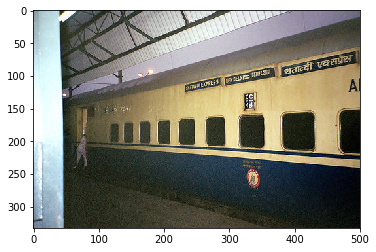

In [54]:
from data.dataset import Dataset
from tqdm import tqdm_notebook as tqdm
imgs=Dataset()

a,d,b,d=imgs[1]

avg=list()
for i in tqdm(range(len(imgs))):
    img,_,_,_=imgs[i]
    img=img/255
    avg.append(img.reshape(3,-1).mean(axis=1))
    
# # print(a.shape)
# print(a.reshape(3,-1).mean(axis=1))
a=a.transpose(1,2,0)/255
plt.imshow(a)

In [56]:
avg_np=np.array(avg)
a=np.mean(avg_np,axis=0)
b=np.std(avg_np,axis=0)
print(a,b)

[0.457582   0.43799552 0.4049647 ] [0.12056935 0.12215929 0.13996178]


In [9]:
# from model.faster_rcnn import FasterRCNN as FRCNN

# fNet=FRCNN(n_class=10)
# x=x.to(dtype=dtype,device=device)
# fNet.cuda(device=device)

# bboxes, labels, scores=fNet.predict(x)
# # print(fNet)
# # y=fNet.featureNet(x)
# # score, loc, rois,roi_indices, anchor=fNet.rpn(y, [512,512])
# # a=fNet.head.RoIPool(featureMap, rois , roi_indices)
# print(l.shape,s.shape)

In [10]:
from model.utils.vgg_decompose import FeatureNet as features
x=x.to(dtype=dtype,device=device)
features.cuda(device=device)
featureMap=features(x)
featureMap.shape

ModuleNotFoundError: No module named 'model.utils.vgg_decompose'

In [ ]:
# import torch.nn as nn
# output=[]
# t=featureMap[0]
# g=nn.AdaptiveMaxPool2d((7,7))
# m=g(t[:,1:25,2:10])
# output.append(m)

# # t=featureMap[1]
# # g=nn.AdaptiveMaxPool2d((7,7))
# # m=g(t[:,5:25,1:10])
# # output.append(m)

# e=torch.stack(output, dim=0)
# print(e.shape)

In [ ]:
from model.utils.vgg_decompose import ClassifierNet as classifier

classifier

In [ ]:
from model.utils.rpn import RPN
rNet=RPN()
rNet.cuda()
# rNet.eval()

In [ ]:
img_size=img1.shape
print(img_size)
score, loc, rois,roi_indices, anchor=rNet(featureMap, img_size)

In [ ]:
print(roi_indices.shape)

In [ ]:
from model.utils.vgg_roi_head import VGG_RoI_Head
vNet=VGG_RoI_Head(10)
vNet.cuda()
final_loc, final_score = vNet(featureMap, rois, roi_indices)
print(final_loc.shape)

In [ ]:
from model.utils.final_suppression import suppression

bboxes, labels, scores=suppression(rois,roi_indices,final_loc, final_score, 10, img_size, img_number=2, high_thresh=True)

In [ ]:
# import fina
print(bboxes[1].shape)

In [ ]:
print(bboxes[0].shape)

In [ ]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(15,15))

# Display the image
ax.imshow(img2)
n=50
bbox=bboxes[0]
for i in range(n,n+5):
    xy=bbox[i][0:2]
    w=bbox[i][2]-bbox[i][0]
    h=bbox[i][3]-bbox[i][1]
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,w,h,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()
print(bboxes[0].shape)

In [ ]:
# type(rois)
# rois=torch.from_numpy(rois)
# rois.reshape(-1,1,4).shape
# loc.cpu().data.numpy()
# type(rois)

In [ ]:
from model.faster_rcnn import FasterRCNN as FRCNN

fNet=FRCNN()
x=x.to(dtype=dtype,device=device)
# fNet.cuda(device=device)

# l,s=fNet(x)
# print(fNet)
# y=fNet.featureNet(x)
# score, loc, rois,roi_indices, anchor=fNet.rpn(y, [512,512])
# a=fNet.head.RoIPool(featureMap, rois , roi_indices)

In [ ]:
from model.utils.roi_pooling import RoIPool
roiPool=RoIPool()
output=roiPool(featureMap,rois, roi_indices)

# from model.utils.vgg_decompose import classifier

# print(output.shape)
# classifier.cuda()
# output.to(device=device)
# output=output.view(output.size(0),-1)
# out=classifier(output)

# print(out.shape)

# from model.utils.vgg_roi_head import VGG_RoI_Head
# RoIHead=VGG_RoI_Head(n_class=10)
# RoIHead.cuda()
# output.to(device=device)
# final_loc, final_score= RoIHead(featureMap, rois, roi_indices)

In [ ]:
print(final_loc.shape)
print(final_score[0])

In [ ]:
print(output.shape)

In [ ]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(15,15))


# Display the image
ax.imshow(img1)

# rois=anchor
print(rois.shape)
n=100
for i in range(n,n+3):
    xy=rois[i][0:2]
    w=rois[i][2]-rois[i][0]
    h=rois[i][3]-rois[i][1]
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,w,h,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()




In [ ]:
from trainer import FasterRCNNTrainer
from model.faster_rcnn import FasterRCNN

faster_rcnn=FasterRCNN()
faster_rcnn.cuda()
trainer = FasterRCNNTrainer(faster_rcnn)

In [ ]:
import torch
import torch.nn as nn

model=nn.Sequential(nn.Conv2d(3,10,3))
torch.optim.SGD(model.parameters(),0.1)

In [ ]:
from data.dataset import Dataset

In [ ]:
imgDataset=Dataset()

In [ ]:
img, bbox, label, scale = imgDataset[100]
print(img.shape)
print(bbox.shape)
print(label.shape)
print(scale)

print('bbox',bbox)
print('label', label)

imgs=img[None,:,:,:]
bboxs=bbox[None,:,:]
labels=label[None,:]
scales=scale

device=torch.device('cuda')
dtype=torch.float
imgs=torch.from_numpy(imgs).to(dtype=dtype, device=device)
bboxs=torch.from_numpy(bboxs).to(dtype=dtype, device=device)
labels=torch.from_numpy(labels).to(dtype=dtype, device=device)


In [ ]:
for i in range(1000):
    img, bbox, label, scale = imgDataset[i]
    imgs=img[None,:,:,:]
    bboxs=bbox[None,:,:]
    labels=label[None,:]
    scales=scale

    device=torch.device('cuda')
    dtype=torch.float
    imgs=torch.from_numpy(imgs).to(dtype=dtype, device=device)
    bboxs=torch.from_numpy(bboxs).to(dtype=dtype, device=device)
    labels=torch.from_numpy(labels).to(dtype=dtype, device=device)
    loss=trainer.train_step(imgs, bboxs, labels, scales)
    print(loss.total_loss.cpu().detach().numpy())